# Observation 1

Based on the data and graphs below, the first observation I noticed is that as the weight of the mouse increases, 
the total amount of tumors per mouse increases. As descirbed when calculating the correlation coeffecient.

# Observation 2

Based on the calculations for outliers it is safe to assume that with in this population of mice, the results of 
the drug regimen have relatively had the similar results across the population. Producing zero outliers leads me 
to the conculsion that each drug has reacted similarly with each mouse.

# Observation 3

The distribution of males versus females was even with the drug regimen. I believe this produces more accurate data
by maintaining the same number of test subjects for both genders.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
combined_sorted = combined_data.sort_values(["Tumor Volume (mm3)"], ascending = True)
combined_sorted.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped = combined_sorted.groupby(["Drug Regimen"])

mouse_id = grouped["Mouse ID"].count()
regimen_mean = grouped["Tumor Volume (mm3)"].mean()
regimen_median = grouped["Tumor Volume (mm3)"].median()
regimen_variance = grouped["Tumor Volume (mm3)"].var()
regimen_standard = grouped["Tumor Volume (mm3)"].std()
regimen_sem = grouped["Tumor Volume (mm3)"].sem()


regimen_sum = grouped["Tumor Volume (mm3)"].sum()


summary = pd.DataFrame({"Mouse ID" : mouse_id,
                        "Mean": regimen_mean,
                        "Median": regimen_median,
                        "Variance": regimen_variance,
                        "Standard Deviation": regimen_standard,
                        "SEM": regimen_sem
                        })

summary

,Mouse ID,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

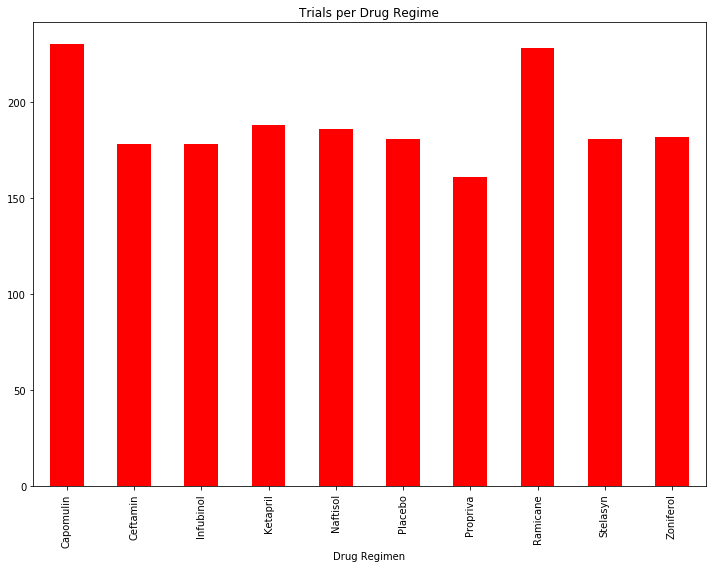

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summary = pd.DataFrame(combined_sorted.groupby("Drug Regimen").count())

datapoint = summary[["Mouse ID"]]

datapoint.plot(kind="bar", figsize=(10,8), color = "r", legend=False)
plt.title("Trials per Drug Regime")

plt.tight_layout()
plt.show()

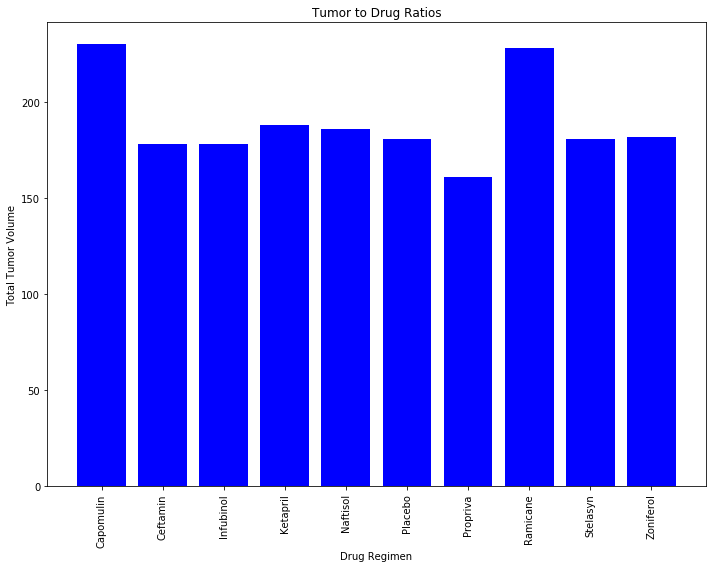

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mouse_id = [230,178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(drugs))

plt.figure(figsize = (10,8))
plt.bar(x_axis, mouse_id, color=['blue'], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)

degrees = 90
plt.xticks(rotation=degrees)

plt.title("Tumor to Drug Ratios")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Tumor Volume")

plt.tight_layout()
plt.show()

## Pie plots

In [9]:
sex = combined_sorted["Sex"].value_counts()
sex

Male      958
Female    935
Name: Sex, dtype: int64

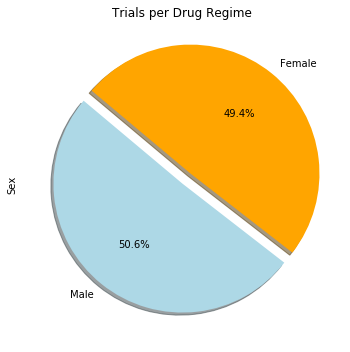

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = combined_sorted["Sex"].value_counts()
colors = ["lightblue", "orange"]

plt.figure(figsize = (5,5))
sex.plot(kind ="pie", explode = (0, 0.1), labels = sex.index.values, colors = colors,
               autopct = "%1.1f%%", shadow = True, startangle = 140, subplots = True, legend = False)
plt.title("Trials per Drug Regime")


plt.tight_layout()
plt.show()

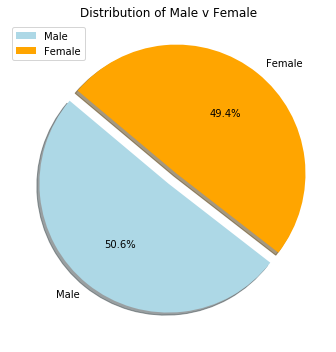

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 935]

colors = ["lightblue", "orange"]
explode = (0, 0.1)

plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Distribution of Male v Female")
plt.legend(labels, loc= "upper left")
plt.tight_layout()

plt.savefig("Pie2019.png")

plt.show()

## Quartiles, outliers and boxplots

In [12]:
combined_sorted.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
treatment = combined_sorted.loc[(combined_sorted["Drug Regimen"] == "Capomulin") 
                  | (combined_sorted["Drug Regimen"] == "Ramicane") 
                  | (combined_sorted["Drug Regimen"] == "Ceftamin") 
                  | (combined_sorted["Drug Regimen"] == "Propriva"), 
                  :]
treatment = treatment.sort_values("Timepoint", ascending = False)

treatment = treatment.drop_duplicates(subset="Mouse ID", keep='first')
treatment


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
282,l897,Capomulin,Male,17,19,45,38.846876,1
390,r944,Capomulin,Male,12,25,45,41.581521,2
380,l509,Capomulin,Male,17,21,45,41.483008,3
370,s710,Capomulin,Female,1,23,45,40.728578,1
...,...,...,...,...,...,...,...,...
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = treatment['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)

outlier = treatment.loc[(treatment['Tumor Volume (mm3)'] > upper_bound) 
                         | (treatment['Tumor Volume (mm3)'] < lower_bound), 
                         :]
outlier

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


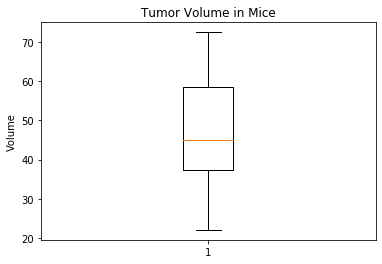

<Figure size 2160x2880 with 0 Axes>

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volume = treatment['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume in Mice')
ax1.set_ylabel('Volume')
ax1.boxplot(volume)
plt.figure(figsize = (30,40))
plt.show()

## Line and scatter plots

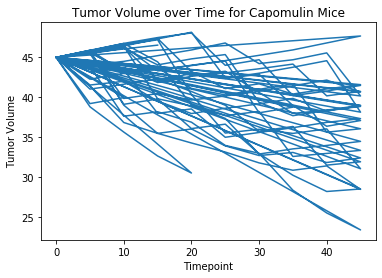

<Figure size 720x720 with 0 Axes>

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin"),:]

tpoint = Capomulin["Timepoint"]
tumor_volume = Capomulin["Tumor Volume (mm3)"]

tumor_volume_line, = plt.plot(tpoint, tumor_volume)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.figure(figsize = (10,10))
plt.show()

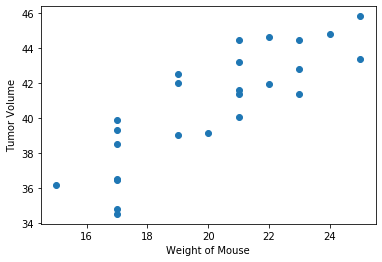

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = Capomulin.groupby(Capomulin["Mouse ID"])["Weight (g)"].mean()
tumor_volume_2 = Capomulin.groupby(Capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(weight,tumor_volume_2)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

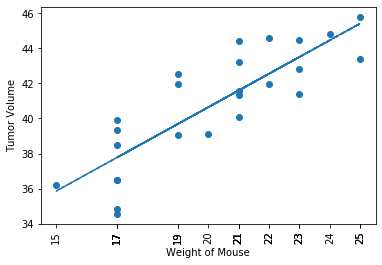

The correlation between weight and tumor value is 0.84


In [32]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen
mweight = Capomulin.groupby(Capomulin["Mouse ID"])["Weight (g)"].mean()
tumor_volume_3 = Capomulin.groupby(Capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mweight, tumor_volume_3)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mweight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mweight,tumor_volume_3)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mweight,fit,"--")
plt.xticks(mweight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mweight,tumor_volume_3)[0],2)
print(f'The correlation between weight and tumor value is {corr}')